In [608]:
import yfinance as yf
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [609]:
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [610]:
ticker = '^NSEI'
df = yf.download(ticker, start='2023-10-01', end='2024-10-01')

[*********************100%***********************]  1 of 1 completed


In [611]:
data = df['Close'].values
data = data.reshape(-1, 1)
data

array([[19528.75      ],
       [19436.09960938],
       [19545.75      ],
       [19653.5       ],
       [19512.34960938],
       [19689.84960938],
       [19811.34960938],
       [19794.        ],
       [19751.05078125],
       [19731.75      ],
       [19811.5       ],
       [19671.09960938],
       [19624.69921875],
       [19542.65039062],
       [19281.75      ],
       [19122.15039062],
       [18857.25      ],
       [19047.25      ],
       [19140.90039062],
       [19079.59960938],
       [18989.15039062],
       [19133.25      ],
       [19230.59960938],
       [19411.75      ],
       [19406.69921875],
       [19443.5       ],
       [19395.30078125],
       [19425.34960938],
       [19443.55078125],
       [19675.44921875],
       [19765.19921875],
       [19731.80078125],
       [19694.        ],
       [19783.40039062],
       [19811.84960938],
       [19802.        ],
       [19794.69921875],
       [19889.69921875],
       [20096.59960938],
       [20133.15039062],


In [612]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [613]:
training_data_len = int(np.ceil(0.8 * len(scaled_data)))

train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len - 60:, :]

x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [614]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

/Users/divyanshu/PycharmProjects/MiniProject/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [615]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [616]:
model.fit(x_train, y_train, batch_size=32, epochs=23, verbose=1)

Epoch 1/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2299
Epoch 2/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0262
Epoch 3/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0321
Epoch 4/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0102
Epoch 5/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0137
Epoch 6/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0077
Epoch 7/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0088
Epoch 8/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087
Epoch 9/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0061
Epoch 10/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0065
Epoch 11/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0068
Epoch 12/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0061
Epoch 13/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0063
Epoch 14/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042
Epoch 15/23
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0048
Epoch 16/23
5/5 ━━━━━━━━━━━━━━━━━━

In [617]:
x_test, y_test = [], data[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get predicted prices
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


In [618]:
future_steps = 20
last_sequence = test_data[-60:].reshape(1, 60, 1)
future_predictions = []

for i in range(future_steps):
    next_price = model.predict(last_sequence)
    future_predictions.append(next_price[0, 0])

    # Corrected the reshaping for next_price to match the dimensions of last_sequence
    last_sequence = np.append(last_sequence[:, 1:, :], np.reshape(next_price, (1, 1, 1)), axis=1)

# Inverse scale future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


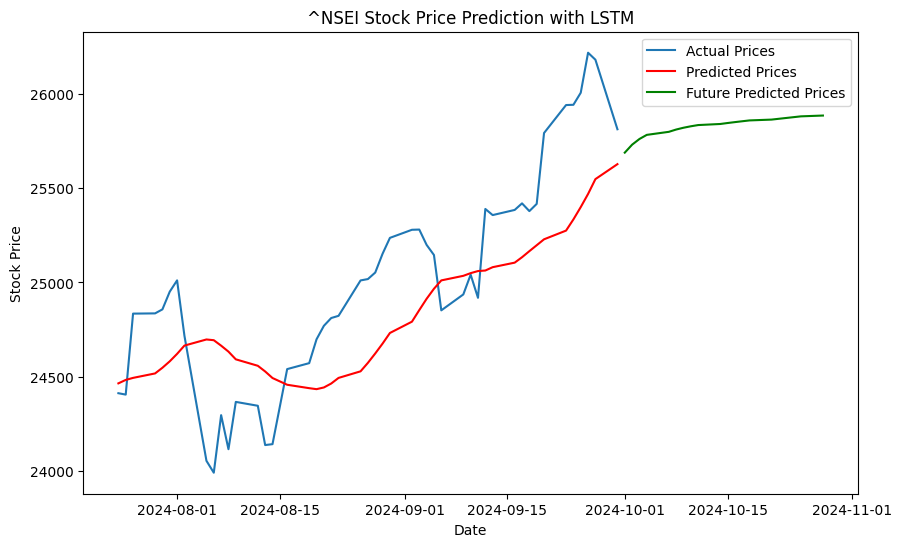

In [619]:
plt.figure(figsize=(10,6))
plt.plot(df.index[training_data_len:], y_test, label='Actual Prices')
plt.plot(df.index[training_data_len:], predictions, label='Predicted Prices', color='red')

# Create future date range for the next 30 days
future_dates = pd.date_range(start=df.index[-1], periods=future_steps + 1, freq='B')[1:]

plt.plot(future_dates, future_predictions, label='Future Predicted Prices', color='green')
plt.title(f'{ticker} Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [620]:
forecasted_values = np.array(future_predictions)
forecasted_values

array([[25687.074],
       [25729.293],
       [25759.383],
       [25781.16 ],
       [25797.234],
       [25809.404],
       [25818.908],
       [25826.602],
       [25833.074],
       [25838.738],
       [25843.87 ],
       [25848.654],
       [25853.225],
       [25857.664],
       [25862.021],
       [25866.336],
       [25870.629],
       [25874.91 ],
       [25879.188],
       [25883.463]], dtype=float32)

In [621]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

raw_actual = yf.download(ticker, start='2024-10-01', end='2024-10-30')

[*********************100%***********************]  1 of 1 completed


In [622]:
raw_actual.dropna(inplace=True)
actual_values = np.array(raw_actual['Close'])

actual_values

array([[25796.90039062],
       [25250.09960938],
       [25014.59960938],
       [24795.75      ],
       [25013.15039062],
       [24981.94921875],
       [24998.44921875],
       [24964.25      ],
       [25127.94921875],
       [25057.34960938],
       [24971.30078125],
       [24749.84960938],
       [24854.05078125],
       [24781.09960938],
       [24472.09960938],
       [24435.5       ],
       [24399.40039062],
       [24180.80078125],
       [24339.15039062],
       [24466.84960938]])

In [623]:
mape = np.mean(np.abs((actual_values - forecasted_values) / actual_values)) * 100

In [624]:
mae = mean_absolute_error(actual_values, forecasted_values)

In [625]:
rmse = np.sqrt(mean_squared_error(actual_values, forecasted_values))

In [626]:
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Percentage Error (MAPE): 4.07%
Mean Absolute Error (MAE): 1004.50
Root Mean Squared Error (RMSE): 1074.94


In [627]:
df_lstm = pd.DataFrame(forecasted_values)
df_lstm.dropna(inplace=True)
df_lstm.to_csv('/Users/divyanshu/PycharmProjects/MiniProject/lstm.csv')